# Data Exploration

In the following is  some crossectional preliminary analysis of the SOEP dataset. To note is that most the plots made are based on simple regression models between the target variable (subjective well being) and other covariates. This means that most associations are most likely non-causal.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from tqdm import tqdm

%matplotlib inline  

sns.set_theme()

The dataset read in the following code block is the logitudinal data of the SOEP data merged with weather data downloaded from `meteostat`. Most of the data preparation was already completed in the `weathermerge.ipynb` notebook.

In [21]:
target = ['plh0182', 'plh0182d']
exogsoep = [
    'bula_h', 'sex', 'age', 'hlc0005_h'
]
exogweather = [
    'tavgbin_0', 'tavgbin_1', 'tavgbin_2', 'tavgbin_3', 'tavgbin_4',
    'tavgbin_5', 'tavgbin_6', 'tavgbin_7', 'prcp', 'tsun', 'wspd', 'pres'
]
soep = pd.read_csv('./prod/data.csv', usecols=target+exogsoep+exogweather)

For a first analisys we focus on Berlin. The reason being that it is the smallest NUTS1 area and will therefore contain the most accurate average weather data.

In [22]:
from sklearn.model_selection import train_test_split

# read all hh data that is in berlin and drop all unusable data
berlin = soep[soep['bula_h'] == 11].drop(columns='bula_h').dropna()

# free up memory
del soep

# split into target and training variables 
y = berlin['plh0182d']
X = berlin[['sex', 'age', 'hlc0005_h']+exogweather]

# split into train test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33)

## First regression model (cross sectional)

TODO
- take rate of change within swb variable with respect to the individual person (pid).
- run OLS regression model.

TODO

In [23]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

result = lm.fit(X, y)
result.coef_

array([ 2.43279742e-02,  1.40910902e-04,  6.25824437e-06,  1.20981756e-02,
        1.32429752e-02,  1.69946902e-02,  1.23667069e-02,  1.48601457e-02,
        2.12646967e-02, -3.98210387e-03, -8.68452866e-02, -1.83163967e-02,
       -5.91507868e-06,  4.18666595e-03,  1.24989133e-03])

## Plots of findings

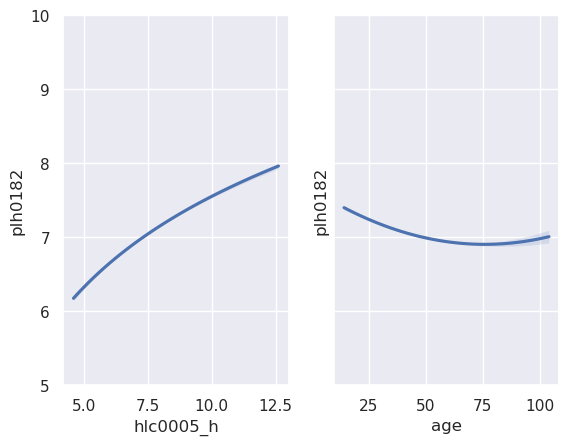

In [4]:
fig, ax = plt.subplots(ncols=2, sharey=True)

# everyone earns at least 10 euro s.t. log reg can be run on it
soep['hlc0005_h'] = soep['hlc0005_h'] + 10

# plot the regression lines
sns.regplot(x=np.log(soep['hlc0005_h']), y=soep['plh0182'], logx=True, scatter=False, ax=ax[0])
sns.regplot(data=soep, x='age', y='plh0182', order=2, scatter=False, ax=ax[1])

for col in range(2):
    ax[col].set_ylim(5, 10)
    
plt.show()

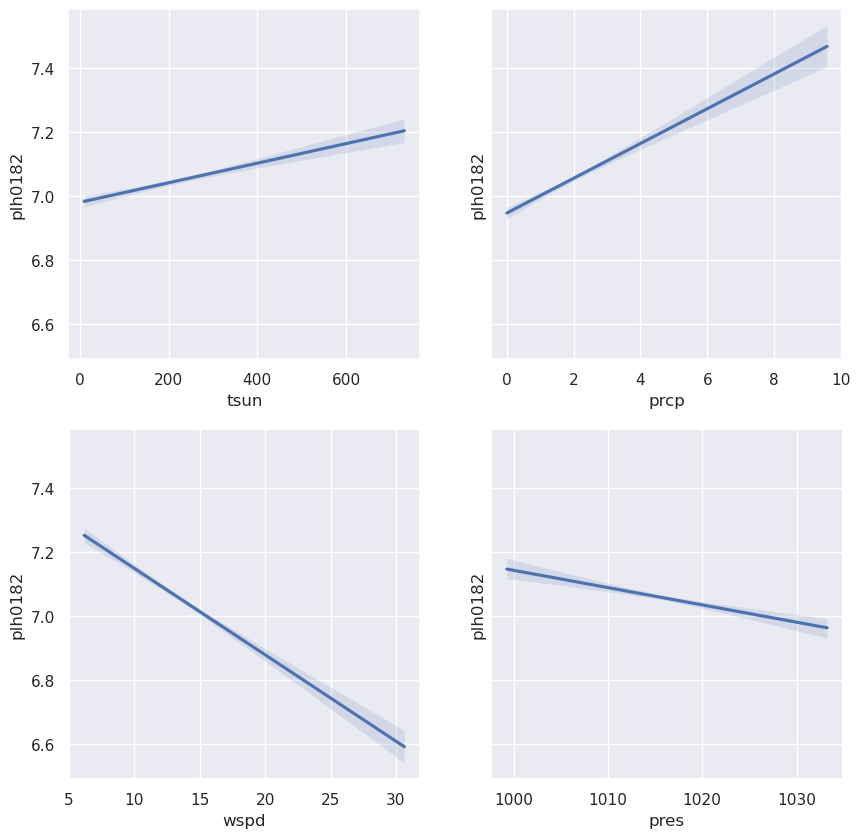

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)

sns.regplot(data=soep, x='tsun', y='plh0182', scatter=False, ax=ax[0, 0])
sns.regplot(data=soep, x='prcp', y='plh0182', scatter=False, ax=ax[0, 1])
sns.regplot(data=soep, x='wspd', y='plh0182', scatter=False, ax=ax[1, 0])
sns.regplot(data=soep, x='pres', y='plh0182', scatter=False, ax=ax[1, 1])

plt.show()

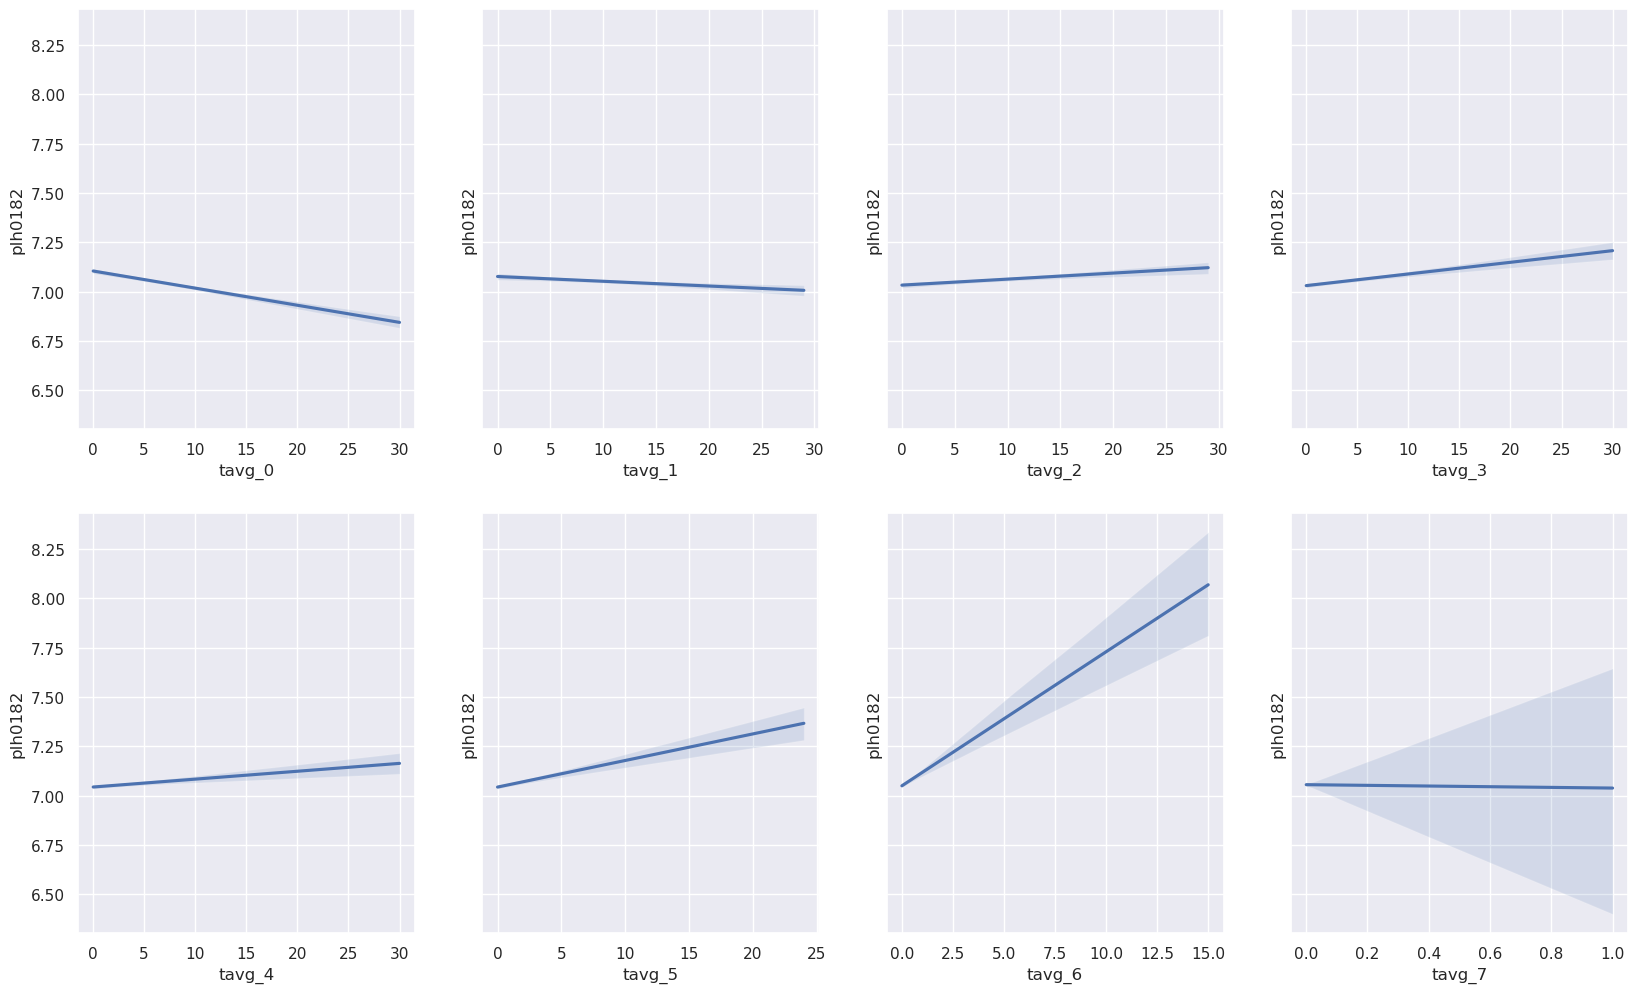

In [6]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,12), sharey=True)

for row in range(2):
    for col in range(4):
        sns.regplot(data=soep, x=f'tavg_{row*4 + col}', y='plh0182', scatter=False, ax=ax[row, col])
        
fig.savefig("temperature_effect.png")        
plt.show()

Below a principle component analysis to see which variables give the dataset the most variance.

In [31]:
from sklearn.decomposition import PCA

# get only the non categorical numeric columns
df_normalized = soep.drop(columns=['bula_h','pid','time'])

# clear up some memory
del soep

# Normalize the data
df_normalized=(df_normalized - df_normalized.mean()) / df_normalized.std()

# fit the pca
pca = PCA(n_components=df_normalized.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
    index=df_normalized.columns
)

loadings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
plh0182,0.021736,-0.037249,-0.022975,0.469737,0.501047,-0.243204,-0.030209,0.089821,-0.672679,-0.013853,-0.001064,-0.071074,-0.003470,-0.001587,0.005217,-0.000002
sex,-0.002630,0.010369,-0.006049,-0.099336,-0.152802,-0.964465,-0.080356,0.023132,0.171424,0.005865,-0.001188,0.002264,0.001615,0.000764,0.004097,-0.000005
hlc0005_h,0.049103,-0.051354,-0.058967,0.461024,0.436892,-0.032094,0.391485,0.041638,0.654670,0.026178,0.040610,-0.015420,-0.004935,-0.006135,0.028384,-0.000002
age,-0.092762,0.056059,0.014716,-0.146950,-0.227541,-0.070702,0.898905,0.091501,-0.284997,0.103900,0.025418,0.015956,-0.002737,-0.005249,0.017634,0.000001
tavg_0,-0.263912,0.483709,0.095379,-0.153753,0.197105,-0.000110,-0.021540,0.196521,0.038953,-0.207161,0.331029,-0.071462,-0.329795,0.048358,-0.264771,-0.495355
tavg_1,-0.406836,0.056343,0.124732,0.144151,-0.028462,-0.006553,-0.012873,-0.148835,0.018380,0.150924,-0.457104,0.162017,0.519499,0.068479,-0.165939,-0.459769
tavg_2,-0.119043,-0.494151,-0.316952,0.259880,-0.286462,0.003988,-0.008364,-0.200674,-0.040510,0.016076,0.095202,0.164643,-0.454389,-0.077970,0.032790,-0.446695
tavg_3,0.334613,-0.246414,-0.281335,-0.211636,0.079446,0.010534,0.018066,0.287760,-0.015400,-0.163656,0.267268,-0.037915,0.467551,0.312861,0.198134,-0.397728
tavg_4,0.427101,0.041059,0.191622,-0.145553,0.097315,-0.002365,0.018316,0.010612,0.000728,0.197012,-0.227868,-0.226297,-0.055173,-0.645769,0.184265,-0.390008
tavg_5,0.356143,0.171391,0.345609,0.114185,-0.079244,-0.010239,0.030433,-0.273973,-0.014216,0.138728,-0.172406,-0.094696,-0.266540,0.642123,0.235256,-0.179115


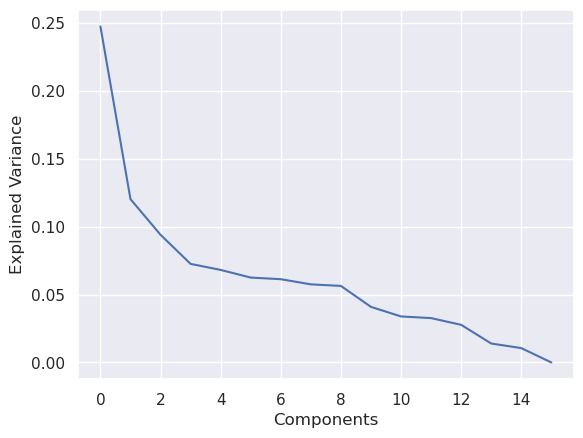

In [30]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

From the plots above we can see that the target variable does not induce the dataset with that mutch information/explain that much of the variance (see table of PCs). However, this could just be because the weather related variables simply correlate very strongly with eachother and therefore shadow over the other variables. Another reason could be that most of the variables do not associate linearly in which case the PCA would not yield any useful results anyways.

In [14]:
# clear some memory
del soep

## First FE model

To see first results of a fixed effects model on more granular data we will use Berlin as a use case since it is the smalles NUTS 1 area in Germany. This should be a good indicator to what results we can expect on more fine graned data. Although it must be said that Berlin has quite mild temperatures compared to more suthern regions in Germany.

In [15]:
from linearmodels import PanelOLS

First the berlin dataframe needs to be modified such that it fits the requirements of the `PanelOLS` model.

In [16]:
# remove bundesland variable as now there is no variation there anymore
berlin.drop(columns='bula_h', inplace=True)
# remove all days from time column to get only year month fe
berlin['month'] = berlin['time'].apply(lambda x: int(x.strftime('%m')))
# set index to person id and time for the FE (required by model)
berlin.set_index(['pid', 'age'], inplace=True)
berlin

,,time,plh0182,sex,hlc0005_h,tavg_0,tavg_1,tavg_2,tavg_3,tavg_4,tavg_5,tavg_6,tavg_7,prcp,tsun,wspd,pres,month
pid,age,,,,,,,,,,,,,,,,,
1001.0,72.0,1985-03-01,6.0,2.0,551.0,19.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.812000,192.000000,22.614444,1020.455000,3
1301.0,42.0,1985-03-01,3.0,2.0,1043.0,19.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.812000,192.000000,22.614444,1020.455000,3
1302.0,20.0,1985-03-01,7.0,1.0,1043.0,19.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.812000,192.000000,22.614444,1020.455000,3
11701.0,43.0,1985-03-05,7.0,1.0,2352.0,18.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307333,205.600000,19.509444,1021.455833,3
11702.0,47.0,1985-03-05,6.0,2.0,2352.0,18.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307333,205.600000,19.509444,1021.455833,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53152401.0,38.0,2020-12-21,10.0,2.0,5000.0,4.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,0.308095,99.466667,10.549333,1014.366667,12
53868101.0,39.0,2020-12-21,9.0,1.0,-1.0,4.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,0.308095,99.466667,10.549333,1014.366667,12
52973701.0,25.0,2020-12-22,-1.0,1.0,2500.0,4.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,0.466190,99.466667,10.648667,1013.960833,12


Now we train the `PanelOLS` model.

In [18]:
Y = 'plh0182'
X = [ 
    'hlc0005_h', 'tavg_0', 'tavg_1', 'tavg_2', 'tavg_3', 'tavg_4',
    'tavg_5', 'tavg_6', 'tavg_7', 'prcp', 'tsun', 'wspd', 'pres'
]

model = PanelOLS(dependent=berlin[Y], exog=berlin[X], entity_effects=True, time_effects=True, drop_absorbed=True)

result = model.fit(cov_type="clustered", low_memory=True)

In [19]:
result.summary

Dep. Variable:,plh0182,R-squared:,0.0086
Estimator:,PanelOLS,R-squared (Between):,0.0231
No. Observations:,27602,R-squared (Within):,0.0060
Date:,"Fri, Jan 27 2023",R-squared (Overall):,0.0211
Time:,12:14:21,Log-likelihood,-5.054e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,16.647
Entities:,4529,P-value,0.0000
Avg Obs:,6.0945,Distribution:,"F(12,22978)"
Min Obs:,1.0000,,
Max Obs:,36.000,F-statistic (robust):,4.25e+04


- [ ] run a linear regression on the whole dataset. and plot predictions onto the first 2/3 PC
- [ ] run a FE using only data from the smallest bundesland (Berlin). Will give first insight to what can be accomplished using this style of analysis
- [ ] 
```python
soep = soep[soep['bula_h'] == 11]
```